# Exploring Data

*Written by Todd Gureckis*

So far in this course we've learned a bit about using Jupyter, some Python basics, and have been introduced to Pandas dataframes and at least a start at some of the ways to plot data.

In this lab, we are going to pull those skills into practice to try to "explore" a data set.  At this point we are not really going to be doing much in terms of inferential statistics.  Our goals are just to be able to formulate a question and then try to take the steps necessary to compute descriptive statistics and plots that might give us a sense of the answer.  You might call it "Answering Questions with Data."

First, we load the basic packages we will be using in this tutorial.  Remeber how we import the modules using an abbreviated name (`import XC as YY`).  This is to reduce the amount of text we type when we use the functions.

**Note**: `%matplotlib inline` is an example of something specific to Jupyter call 'cell magic' and enables plotting *within* the notebook and not opening a separate window.

In [19]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from datetime import datetime
import random

## Reminders of basic pandas functions

As a reminder of some of the pandas basics lets revisit the data set of professor salaries we have considered over the last few lectuers.

In [20]:
salary_data = pd.read_csv('http://gureckislab.org/courses/fall19/labincp/data/salary.csv', sep = ',', header='infer')

Notice that the name of the dataframe is now called `salary_data` instead of `df`.  It could have been called anything as it is just our variable to work with.  However, you'll want to be careful with your nameing when copying commands and stuff from the past.

### peek at the data

In [21]:
salary_data.head()

,salary,gender,departm,years,age,publications
0,86285,0,bio,26.0,64.0,72
1,77125,0,bio,28.0,58.0,43
2,71922,0,bio,10.0,38.0,23
3,70499,0,bio,16.0,46.0,64
4,66624,0,bio,11.0,41.0,23


### Get the size of the dataframe

In rows, columns format

In [22]:
salary_data.shape

(77, 6)

### Access a single column

In [23]:
salary_data[['salary']]

,salary
0,86285
1,77125
2,71922
3,70499
4,66624
5,64451
6,64366
7,59344
8,58560
9,58294


### Compute some descriptive statistics

In [24]:
salary_data[['salary']].describe()

,salary
count,77.000000
mean,67748.519481
std,15100.581435
min,44687.000000
25%,57185.000000
50%,62607.000000
75%,75382.000000
max,112800.000000


In [25]:
salary_data[['salary']].count()  # how many rows are there?

salary    77
dtype: int64

### creating new column based on the values of others

In [26]:
salary_data['pubperyear'] = 0
salary_data['pubperyear'] = salary_data['publications']/salary_data['years']

### Selecting only certain rows

In [27]:
sub_df=salary_data[ (salary_data.salary > 90000) & (salary_data.salary < 100000)]

In [10]:
sub_df

,salary,gender,departm,years,age,publications,pubperyear
14,97630,0,chem,34.0,64.0,43,1.264706
30,92951,0,neuro,11.0,41.0,20,1.818182
54,96936,0,physics,15.0,50.0,17,1.133333


In [28]:
sub_df.describe()

,salary,gender,years,age,publications,pubperyear
count,3.00000,3.0,3.000000,3.000000,3.000000,3.000000
mean,95839.00000,0.0,20.000000,51.666667,26.666667,1.405407
std,2525.03802,0.0,12.288206,11.590226,14.224392,0.363458
min,92951.00000,0.0,11.000000,41.000000,17.000000,1.133333
25%,94943.50000,0.0,13.000000,45.500000,18.500000,1.199020
50%,96936.00000,0.0,15.000000,50.000000,20.000000,1.264706
75%,97283.00000,0.0,24.500000,57.000000,31.500000,1.541444
max,97630.00000,0.0,34.000000,64.000000,43.000000,1.818182


## Get the unique values of a columns

In [29]:
salary_data['departm'].unique()

array(['bio', 'chem', 'geol', 'neuro', 'stat', 'physics', 'math'],
      dtype=object)

How many unique department values are there?

In [30]:
salary_data['departm'].unique().size

7

or

In [31]:
len(salary_data['departm'].unique())

7

### Breaking the data into subgroups

In [32]:
male_df = salary_data[salary_data.gender == 0].reset_index(drop=True)
female_df = salary_data[salary_data.gender == 1].reset_index(drop=True)

### Recombining subgroups

In [33]:
pd.concat([female_df, male_df],axis = 0).reset_index(drop=True)

,salary,gender,departm,years,age,publications,pubperyear
0,59139,1,bio,8.0,38.0,23,2.875000
1,52968,1,bio,18.0,48.0,32,1.777778
2,55949,1,chem,4.0,34.0,12,3.000000
3,58893,1,neuro,10.0,35.0,4,0.400000
4,53662,1,neuro,1.0,31.0,3,3.000000
5,57185,1,stat,9.0,39.0,7,0.777778
6,52254,1,stat,2.0,32.0,9,4.500000
7,61885,1,math,23.0,60.0,9,0.391304
8,49542,1,math,3.0,33.0,5,1.666667
9,86285,0,bio,26.0,64.0,72,2.769231


### Scatter plot two columns

Text(0.5, 1.0, 'Salary and age')

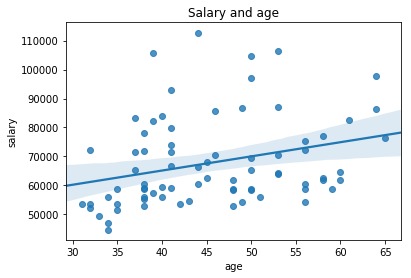

In [34]:
ax = sns.regplot(salary_data.age, salary_data.salary)
ax.set_title('Salary and age')

### Histogram of a column

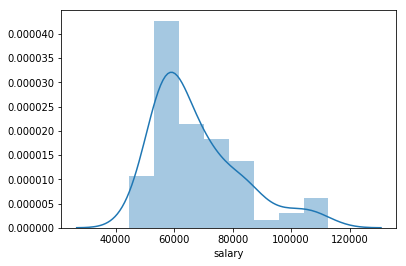

In [35]:
sns.distplot(salary_data['salary'])

You can also combine two different histograms on the same plot to compared them more easily.

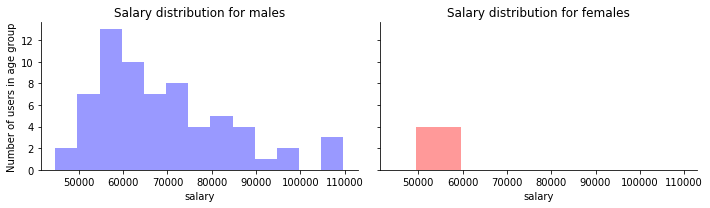

In [8]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,3),sharey=True,sharex=True)
sns.distplot(male_df["salary"], ax=ax1,
             bins=range(male_df["salary"].min(),male_df["salary"].max(), 5000),
             kde=False,
             color="b")
ax1.set_title("Salary distribution for males")
sns.distplot(female_df["salary"], ax=ax2,
             bins=range(female_df["salary"].min(),female_df["salary"].max(), 5000),
             kde=False,
             color="r")
ax2.set_title("Salary distribution for females")
ax1.set_ylabel("Number of users in age group")
for ax in (ax1,ax2):
    sns.despine(ax=ax)
fig.tight_layout()

### Group the salary column using the department name and compute the mean

In [37]:
salary_data.groupby('departm')['salary'].mean()

departm
bio        63094.687500
chem       66003.454545
geol       73548.500000
math       60920.875000
neuro      76465.600000
physics    67987.000000
stat       67242.800000
Name: salary, dtype: float64

### Group the age column using the department name and compute the modal age of the faculty

First let's check the age of everyone.

In [44]:
salary_data.age.unique()

array([64., 58., 38., 46., 41., 60., 53., 40., 50., 43., 56., 61., 65.,
       nan, 45., 48., 34., 37., 44., 39., 49., 59., 32., 35., 51., 42.,
       31., 33.])

Ok, there are a few people who don't have an age so we'll need to drop them using `.dropna()` before computing the mode.

Since there doesn't seem to me a mode function provided by default we can write our own custom function and use it as a descriptive statistics using the `.apply()` command.  Here is an example of how that works.

In [46]:
def my_mode(my_array):
    counts = np.bincount(my_array)
    mode = np.argmax(counts)
    return mode, counts[mode]

# wee need to drop the 
salary_data.dropna().groupby('departm')['age'].apply(my_mode)

departm
bio        (38, 4)
chem       (34, 3)
geol       (37, 1)
math       (33, 1)
neuro      (41, 3)
physics    (50, 2)
stat       (32, 2)
Name: age, dtype: object

### OkCupid Data

This document is an analysis of a public dataset of almost 60000 online dating profiles.
The dataset has been [published](http://ww2.amstat.org/publications/jse/v23n2/kim.pdf) in the [Journal of Statistics Education](http://ww2.amstat.org/publications/jse/), Volume 23, Number 2 (2015) by Albert Y. Kim et al., and its collection and distribution was explicitly allowed by OkCupid president and co-founder [Christian Rudder](http://blog.okcupid.com/).  Using these data is therefore ethically and legally acceptable; this is in contrast to another recent release of a [different OkCupid profile dataset](http://www.vox.com/2016/5/12/11666116/70000-okcupid-users-data-release), which was collected without permission and without anonymizing the data (more on the ethical issues in [this Wired article](https://www.wired.com/2016/05/okcupid-study-reveals-perils-big-data-science/)).


In [17]:
profile_data = pd.read_csv('https://github.com/rudeboybert/JSE_OkCupid/blob/master/profiles.csv.zip?raw=true', compression='zip')

<div class="alert alert-info" role="alert">
  <strong>Question 1</strong> <br>
    Plot a historam of the distribution of ages for both men and women on OkCupid.  Provide a brief (1-2 sentence summary of what you see).
</div>

<div class="alert alert-warning" role="alert">
  <strong>Your Answer</strong> <br>
  Delete this text and put your answer here.  The code for your analysis should appear in the cells below.
</div>

<div class="alert alert-info" role="alert">
  <strong>Question 2</strong> <br>
    Find the mean, median and modal age for men and women in this dataset.
</div>

<div class="alert alert-warning" role="alert">
  <strong>Your Answer</strong> <br>
  Delete this text and put your answer here.  The code for your analysis should appear in the cells below.
</div>

<div class="alert alert-info" role="alert">
  <strong>Question 3</strong> <br>
    Plot a histogram of the height of women and men in this dataset.
</div>

<div class="alert alert-warning" role="alert">
  <strong>Your Answer</strong> <br>
  Delete this text and put your answer here.  The code for your analysis should appear in the cells below.
</div>

<div class="alert alert-info" role="alert">
  <strong>Question 4</strong> <br>
    Propose a new type of analysis you'd like to see.  Work with instructor or TA to try to accomplish it.  Be reasonable!
</div>

### Citibike Data

As you know, Citibikes are the bike share system in NYC.  What you might not realize is that a lot of the data about citibikes is made public by the city.  As a result it is a fun dataset to download and to explore.  Although this dataset is not exactly "cognition and perception" it is readily available and is a great way to train up your exploratory data analysis skills!

#### Loading Data

The data for the citibike are provided on a per-month basis as a .zip file.  As a result we first have to download the file and unzip it.  Luckily python can do that for you!

Remember, we use the pd.read_csv() to load a .csv file into a Pandas dataframe.  In this case our citibike data frame will be called `trip_data`.  Be sure to read the code and try to get a sense of what it is doing.  Ask questions if you are unsure.


In [7]:
trip_data = pd.read_csv('https://s3.amazonaws.com/tripdata/201603-citibike-tripdata.zip', compression='zip')

This command loads the data from March, 2016 (The data is called 201603-citibike-tripdata.csv).  Can you guess how we know the date of the data?  Also note that we added a special option to the `read_csv()` to deal with the fact that the datafile we are loading is kind of big and so is a .zip file.

<div class="alert alert-info" role="alert">
  <strong>Question 1</strong> <br>
    Take a look at the data in the dataframe `trip_data` using the tools we have discussed for peaking inside data frames.  What are the columns?  Using a Markdown list describe what you think each one probably means and what the values within in column mean?  You may not know for sure so you might have to make a guess (this is common when you get data from another source... you have to go on hunches and reasonable guesses).  For example what do you think the `usertype` column means and what are the different values in the data?
</div>

<div class="alert alert-warning" role="alert">
  <strong>Your Answer</strong> <br>
  Delete this text and put your answer here.
</div>

<div class="alert alert-info" role="alert">
  <strong>Question 2</strong> <br>
    The data set contains information on individual trips but we might be more interested in the number of trips per bike (to find how often each bike is used ).  Try using the groupby command from pandas to compute the number of trips per bike (`bikeid`) in the dataset.  Plot a histogram of this data.  What did you expect this distribution to look like.  Is it a normal/gaussian distribution?  Why do you think it has this particular shape?
</div>

<div class="alert alert-warning" role="alert">
  <strong>Your Answer</strong> <br>
  Delete this text and put your answer and code below.
</div>